<a href="https://colab.research.google.com/github/anisetusms/anisetusms/blob/main/PROYEK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np


In [ ]:

# =========================
# 1. LOAD DATA
# =========================
df = pd.read_csv("data_siswa-siswi.csv")

In [ ]:
# =========================
# 2. BERSIHKAN ANGKA DENGAN SATUAN (kg, cm, tahun)
# =========================

def clean_numeric(val):
    if pd.isna(val):
        return np.nan
    val = str(val).lower()
    for unit in ["kg", "cm", "tahun", "th", "jam", "Kilogram", "centimeter", "+"]:
        val = val.replace(unit, "")
    val = val.replace(",", ".").strip()
    try:
        return float(val)
    except:
        return np.nan

df["berat_badan_kg"] = df["berat_badan_kg"].apply(clean_numeric)
df["tinggi_badan_cm"] = df["tinggi_badan_cm"].apply(clean_numeric)
df["usia"] = df["usia"].apply(clean_numeric)


'data_siswa-siswi.csv'

In [ ]:
df = df.dropna(axis=1, how="all")


In [ ]:
# =========================
# 2. BERSIHKAN ANGKA DENGAN SATUAN (kg, cm, tahun)
# =========================

def clean_numeric(val):
    if pd.isna(val):
        return np.nan
    val = str(val).lower()
    for unit in ["kg", "cm", "tahun", "th", "jam"]:
        val = val.replace(unit, "")
    val = val.replace(",", ".").strip()
    try:
        return float(val)
    except:
        return np.nan

# Use the actual column names from the raw DataFrame and assign to new, clean columns.
# Correcting the column name to exactly match the DataFrame's column name, including spaces.
df["berat_kg"] = df[" Berapa berat badan kamu sekarang? (dalam kilogram)  "].apply(clean_numeric)
df["tinggi_cm"] = df["Berapa tinggi badan kamu sekarang? (dalam centimeter)"].apply(clean_numeric)
df["usia_tahun"] = df["Usia"].apply(clean_numeric)

In [ ]:
# =========================
# 3. KONVERSI KATEGORI → NILAI RATA2 (untuk pertanyaan frekuensi)
# =========================

# Durasi tidur
mapping_tidur = {
    "< 5 jam": 4,
    "5–6 jam": 5.5,
    "7–8 jam": 7.5,
    "> 8 jam": 9
}
# Corrected: Use the original column name as the source
df["durasi_tidur_jam"] = df["Rata-rata, berapa jam kamu tidur setiap malam?  "].replace(mapping_tidur)

# Makan per hari
mapping_makan = {
    "1 kali": 1,
    "2 kali": 2,
    "3 kali": 3,
    "> 3 kali": 4
}
# Corrected: Use the original column name as the source
df["makan_per_hari"] = df["Dalam 7 hari terakhir, rata-rata kamu makan utama (pagi/siang/malam) berapa kali per hari? "].replace(mapping_makan)
# Jajan per minggu
mapping_jajan = {
    "0 - 2 kali": 1,
    "3 - 5 kali": 4,
    "6 - 10 kali": 8,
    "> 10 kali": 12
}
# Clean the column before mapping to handle inconsistencies like extra spaces
df["jajan_per_minggu"] = df["Dalam 7 hari terakhir, kira-kira berapa kali kamu jajan (di luar makan utama)?  "].astype(str).str.strip().str.replace(r'\s+', ' ', regex=True).replace(mapping_jajan)

# Fast food
mapping_fastfood = {
    "0 - 2 kali": 1,
    "3 -  5 kali": 4,
    "> 5 kali": 7
}
# Corrected: Use the original column name as the source
df["fastfood_per_minggu"] = df["Dalam 7 hari terakhir, berapa kali kamu makan fast food / makanan cepat saji"].replace(mapping_fastfood)

# Minuman manis
mapping_minuman = {
    "0 - 2 gelas": 1,
    "3 - 5 gelas": 4,
    "6 - 10 gelas": 8,
    "> 10 gelas": 12
}
# Corrected: Use the original column name as the source
df["minuman_manis_per_minggu"] = df["Dalam 7 hari terakhir, berapa gelas/porsi minuman manis (teh manis, minuman bersoda, boba, minuman serbuk manis) yang kamu konsumsi?"].replace(mapping_minuman)


/tmp/ipython-input-2776225108.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["durasi_tidur_jam"] = df["Rata-rata, berapa jam kamu tidur setiap malam?  "].replace(mapping_tidur)
/tmp/ipython-input-2776225108.py:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["makan_per_hari"] = df["Dalam 7 hari terakhir, rata-rata kamu makan utama (pagi/siang/malam) berapa kali per hari? "].replace(mapping_makan)
/tmp/ipython-input-2776225108.py:32: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in 

In [ ]:
# =========================
# 4. HITUNG BMI
# =========================
df["tinggi_meter"] = df["tinggi_cm"] / 100
df["BMI"] = df["berat_kg"] / (df["tinggi_meter"] ** 2)

In [ ]:
# =========================
# 5. KATEGORI BMI
# =========================
def bmi_category(bmi):
    if bmi < 18.5:
        return "Kurus"
    elif 18.5 <= bmi < 25:
        return "Normal"
    elif 25 <= bmi < 30:
        return "Overweight"
    else:
        return "Obesitas"

df["kategori_BMI"] = df["BMI"].apply(bmi_category)

# Buat label 0/1 untuk machine learning
df["label_obesitas"] = df["kategori_BMI"].apply(lambda x: 1 if x == "Obesitas" else 0)


In [ ]:
# =========================
# 6. ENCODE KATEGORI
# =========================
kategori_cols = [
    "Jenis Kelamin",
    "Jalur Pendidikan",
    "Asal Sekolah",
    "Kelas",
    "Kamu tinggal bersama siapa",
    "Secara umum, jenis makanan apa yang paling sering kamu konsumsi?  "
]

# Apply get_dummies to df_clean (assuming this is the dataframe before encoding)
# and assign the result to df_encoded for the next step.
df_encoded = pd.get_dummies(df_clean, columns=kategori_cols, drop_first=True)

In [ ]:
# =========================
# 7. SIMPAN DATASET BERSIH
# =========================
df.to_csv("dataset_bersih_final.csv", index=False)

df.head()

,Timestamp,Nama lengkap,Jenis Kelamin,Usia,Jalur Pendidikan,Asal Sekolah,Kelas,Kamu tinggal bersama siapa,Berapa berat badan kamu sekarang? (dalam kilogram),Berapa tinggi badan kamu sekarang? (dalam centimeter),...,usia_tahun,durasi_tidur_jam,makan_per_hari,jajan_per_minggu,fastfood_per_minggu,minuman_manis_per_minggu,tinggi_meter,BMI,kategori_BMI,label_obesitas
0,27/11/2025 14:11:47,Shalomytha Febrina Siregar,Perempuan,17,SMA,SMA NEGERI 1 TARUTUNG,XII,Orang tua/Wali,52kg,158cm,...,17.0,4.0,3,1,1,1,1.58,20.829995,Normal,0
1,27/11/2025 14:30:25,Gracia Lumbantobing,Perempuan,18,SMA,SMA NEGERI 1 TARUTUNG,XII,Kost,54,164,...,18.0,7.5,3,1,1,1,1.64,20.077335,Normal,0
2,27/11/2025 14:40:28,Rossevi Tamba,Perempuan,18 tahun,SMA,SMA NEGERI 3 TARUTUNG,XII,Orang tua/Wali,57,160,...,18.0,5.5,2,4,1,1,1.60,22.265625,Normal,0
3,27/11/2025 14:51:04,Khatarina Hutasoit,Perempuan,18,SMA,SMA NEGERI 3 TARUTUNG,XII,Kost,65,168,...,18.0,4.0,2,1,4,1,1.68,23.030045,Normal,0
4,27/11/2025 16:03:10,Theresia Hasibuan,Perempuan,18 tahun,SMA,SMA NEGERI 3 TARUTUNG,XII,Orang tua/Wali,45kg,150cm,...,18.0,5.5,3,8,4,8,1.50,20.000000,Normal,0


In [ ]:




# ==========================================
# 5. DISTRIBUSI BMI
# ==========================================
plt.figure(figsize=(8,5))
sns.histplot(df["BMI"], kde=True, bins=20)
plt.title("Distribusi BMI")
plt.xlabel("BMI")
plt.ylabel("Frekuensi")
plt.show()

# ==========================================
# 6. PERSENTASE KATEGORI BMI
# ==========================================
plt.figure(figsize=(6,6))
df["kategori_BMI"].value_counts().plot(kind="pie", autopct="%1.1f%%", startangle=90)
plt.title("Proporsi Kategori BMI")
plt.ylabel("")
plt.show()

print("\n===== PERSENTASE KATEGORI BMI =====")
print(df["kategori_BMI"].value_counts(normalize=True) * 100)

# ==========================================
# 7. KORELASI ANTAR VARIABEL NUMERIK
# ==========================================
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=False, cmap="coolwarm")
plt.title("Heatmap Korelasi Numerik")
plt.show()

# ==========================================
# 8. KORELASI DENGAN BMI
# ==========================================
corr_bmi = numeric_df.corr()["BMI"].sort_values(ascending=False)
print("\n===== KORELASI TERHADAP BMI =====")
print(corr_bmi)

# ==========================================
# 9. PERBANDINGAN FAKTOR vs OBESITAS
# ==========================================

plt.figure(figsize=(10,5))
sns.boxplot(x="label_obesitas", y="makan_per_hari", data=df)
plt.title("Perbandingan Makan per Hari vs Status Obesitas")
plt.xlabel("Obesitas (0=Tidak, 1=Iya)")
plt.ylabel("Frekuensi Makan")
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(x="label_obesitas", y="jajan_per_minggu", data=df)
plt.title("Perbandingan Jajan per Minggu vs Obesitas")
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(x="label_obesitas", y="minuman_manis_per_minggu", data=df)
plt.title("Perbandingan Minuman Manis vs Obesitas")
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(x="label_obesitas", y="durasi_tidur_jam", data=df)
plt.title("Durasi Tidur vs Obesitas")
plt.show()

# ==========================================
# 10. FAKTOR KELUARGA vs OBESITAS
# ==========================================
if "Apakah ada keluarga Anda yang pernah atau sedang mengalami obesitas?_Iya" in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x="Apakah ada keluarga Anda yang pernah atau sedang mengalami obesitas?_Iya",
                  hue="label_obesitas", data=df)
    plt.title("Pengaruh Genetik vs Obesitas")
    plt.xlabel("Keluarga Obesitas (1=Iya)")
    plt.show()

# ==========================================
# 11. INSIGHT AWAL (PRINT)
# ==========================================
print("\n===== INSIGHT AWAL DARI EDA =====")

print(f"""
1. Rata-rata BMI siswa: {df['BMI'].mean():.2f}
2. Persentase obesitas: {df['label_obesitas'].mean() * 100:.2f}%
3. Faktor dengan korelasi tertinggi terhadap BMI:
{corr_bmi.head(6)}

4. Pola makan dan minuman manis cenderung lebih tinggi pada kelompok obesitas.
5. Durasi tidur lebih pendek pada kelompok obesitas.
6. Faktor genetik (keluarga obesitas) terlihat memiliki hubungan signifikan.
""")


In [ ]:
# ==========================================
# 1. IMPORT LIBRARY
# ==========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [ ]:
# ==========================================
# 2. LOAD DATA
# ==========================================
df = pd.read_csv("dataset_bersih_final.csv")

print("===== INFORMASI DATA =====")
print(df.info())
print("\n===== 5 DATA TERATAS =====")
display(df.head())


===== INFORMASI DATA =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1316 entries, 0 to 1315
Data columns (total 38 columns):
 #   Column                                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                                --------------  -----  
 0   Timestamp                                                                                                                             1316 non-null   object 
 1   Nama lengkap                                                                                                                          1316 non-null   object 
 2   Jenis Kelamin                                                                                                                         1316 non-null   object 
 3   Usia                                          

,Timestamp,Nama lengkap,Jenis Kelamin,Usia,Jalur Pendidikan,Asal Sekolah,Kelas,Kamu tinggal bersama siapa,Berapa berat badan kamu sekarang? (dalam kilogram),Berapa tinggi badan kamu sekarang? (dalam centimeter),...,usia_tahun,durasi_tidur_jam,makan_per_hari,jajan_per_minggu,fastfood_per_minggu,minuman_manis_per_minggu,tinggi_meter,BMI,kategori_BMI,label_obesitas
0,27/11/2025 14:11:47,Shalomytha Febrina Siregar,Perempuan,17,SMA,SMA NEGERI 1 TARUTUNG,XII,Orang tua/Wali,52kg,158cm,...,17.0,4.0,3,1,1,1,1.58,20.829995,Normal,0
1,27/11/2025 14:30:25,Gracia Lumbantobing,Perempuan,18,SMA,SMA NEGERI 1 TARUTUNG,XII,Kost,54,164,...,18.0,7.5,3,1,1,1,1.64,20.077335,Normal,0
2,27/11/2025 14:40:28,Rossevi Tamba,Perempuan,18 tahun,SMA,SMA NEGERI 3 TARUTUNG,XII,Orang tua/Wali,57,160,...,18.0,5.5,2,4,1,1,1.60,22.265625,Normal,0
3,27/11/2025 14:51:04,Khatarina Hutasoit,Perempuan,18,SMA,SMA NEGERI 3 TARUTUNG,XII,Kost,65,168,...,18.0,4.0,2,1,4,1,1.68,23.030045,Normal,0
4,27/11/2025 16:03:10,Theresia Hasibuan,Perempuan,18 tahun,SMA,SMA NEGERI 3 TARUTUNG,XII,Orang tua/Wali,45kg,150cm,...,18.0,5.5,3,8,4,8,1.50,20.000000,Normal,0



===== MISSING VALUE =====
Timestamp                                                                                                                                  0
Nama lengkap                                                                                                                               0
Jenis Kelamin                                                                                                                              0
Usia                                                                                                                                       0
Jalur Pendidikan                                                                                                                           0
Asal Sekolah                                                                                                                               0
Kelas                                                                                                                          

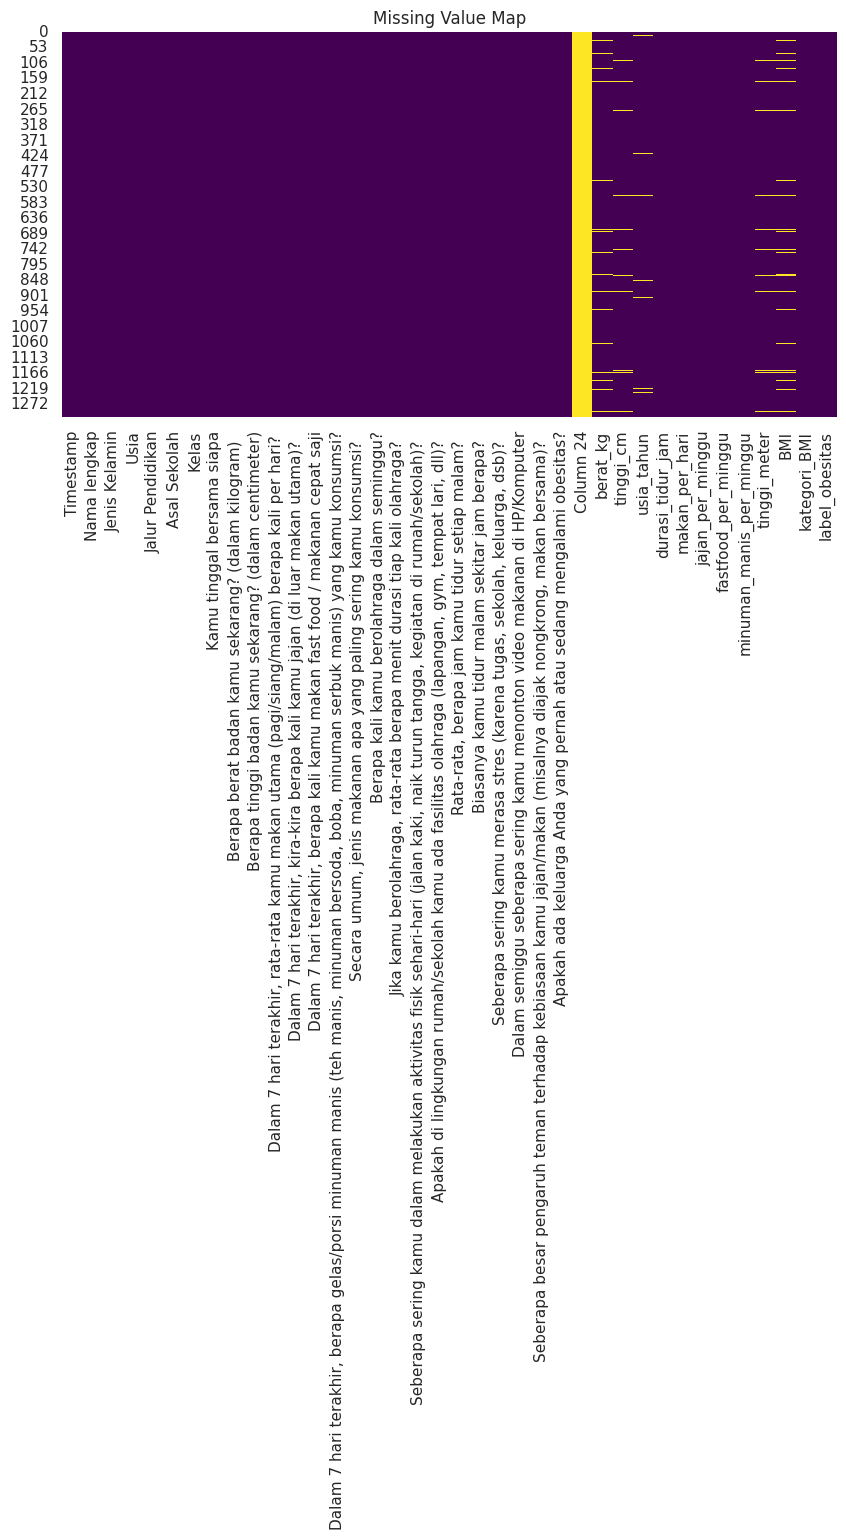

In [ ]:
# ==========================================
# 3. CEK MISSING VALUE
# ==========================================
print("\n===== MISSING VALUE =====")
print(df.isnull().sum())

plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Value Map")
plt.show()

In [ ]:
# ==========================================
# 4. DESKRIPSI STATISTIK NUMERIK
# ==========================================
print("\n===== STATISTIK NUMERIK =====")
display(df.describe())


===== STATISTIK NUMERIK =====


,"Seberapa sering kamu dalam melakukan aktivitas fisik sehari-hari (jalan kaki, naik turun tangga, kegiatan di rumah/sekolah)?","Seberapa sering kamu merasa stres (karena tugas, sekolah, keluarga, dsb)?","Seberapa besar pengaruh teman terhadap kebiasaan kamu jajan/makan (misalnya diajak nongkrong, makan bersama)?",Column 24,berat_kg,tinggi_cm,usia_tahun,durasi_tidur_jam,makan_per_hari,fastfood_per_minggu,minuman_manis_per_minggu,tinggi_meter,BMI,label_obesitas
count,1316.000000,1316.000000,1316.000000,0.0,1264.000000,1276.000000,1284.000000,1316.000000,1316.000000,1316.000000,1316.000000,1276.000000,1245.000000,1316.000000
mean,3.858663,3.203647,3.089666,NaN,54.058521,158.375243,16.084891,6.600684,2.860942,1.756839,2.161094,1.583752,575.964036,0.090426
std,1.217025,1.135471,1.297971,NaN,11.949730,15.481064,0.936714,1.290477,0.509643,1.489683,2.298263,0.154811,9815.683303,0.286899
min,1.000000,1.000000,1.000000,NaN,22.000000,1.450000,14.000000,4.000000,1.000000,1.000000,1.000000,0.014500,6.920415,0.000000
25%,3.000000,3.000000,2.000000,NaN,48.000000,154.000000,15.000000,5.500000,3.000000,1.000000,1.000000,1.540000,18.902038,0.000000
50%,4.000000,3.000000,3.000000,NaN,52.000000,159.000000,16.000000,7.500000,3.000000,1.000000,1.000000,1.590000,20.661157,0.000000
75%,5.000000,4.000000,4.000000,NaN,58.000000,165.000000,17.000000,7.500000,3.000000,1.000000,4.000000,1.650000,22.675737,0.000000
max,5.000000,5.000000,5.000000,NaN,167.000000,255.000000,19.000000,9.000000,4.000000,7.000000,12.000000,2.550000,195005.945303,1.000000


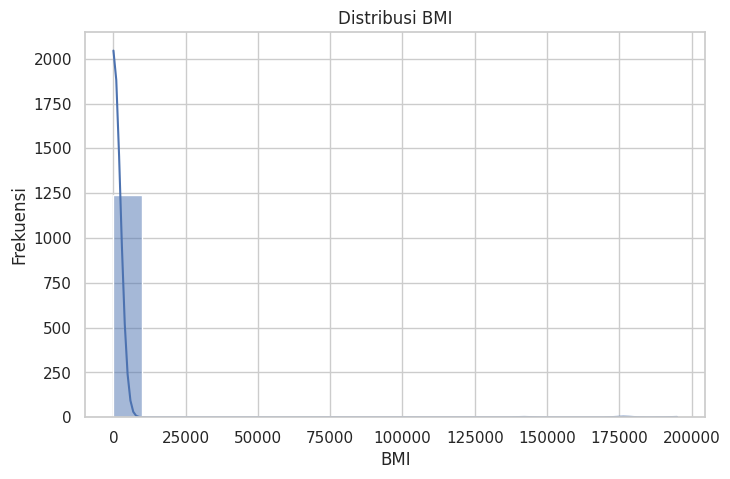

In [ ]:
# ==========================================
# 5. DISTRIBUSI BMI
# ==========================================
plt.figure(figsize=(8,5))
sns.histplot(df["BMI"], kde=True, bins=20)
plt.title("Distribusi BMI")
plt.xlabel("BMI")
plt.ylabel("Frekuensi")
plt.show()

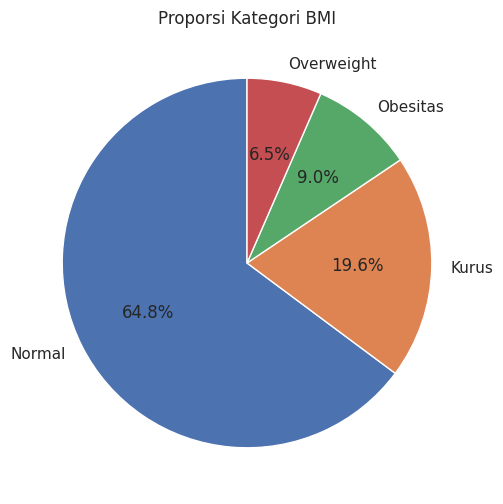


===== PERSENTASE KATEGORI BMI =====
kategori_BMI
Normal        64.817629
Kurus         19.604863
Obesitas       9.042553
Overweight     6.534954
Name: proportion, dtype: float64


In [ ]:
# ==========================================
# 6. PERSENTASE KATEGORI BMI
# ==========================================
plt.figure(figsize=(6,6))
df["kategori_BMI"].value_counts().plot(kind="pie", autopct="%1.1f%%", startangle=90)
plt.title("Proporsi Kategori BMI")
plt.ylabel("")
plt.show()

print("\n===== PERSENTASE KATEGORI BMI =====")
print(df["kategori_BMI"].value_counts(normalize=True) * 100)


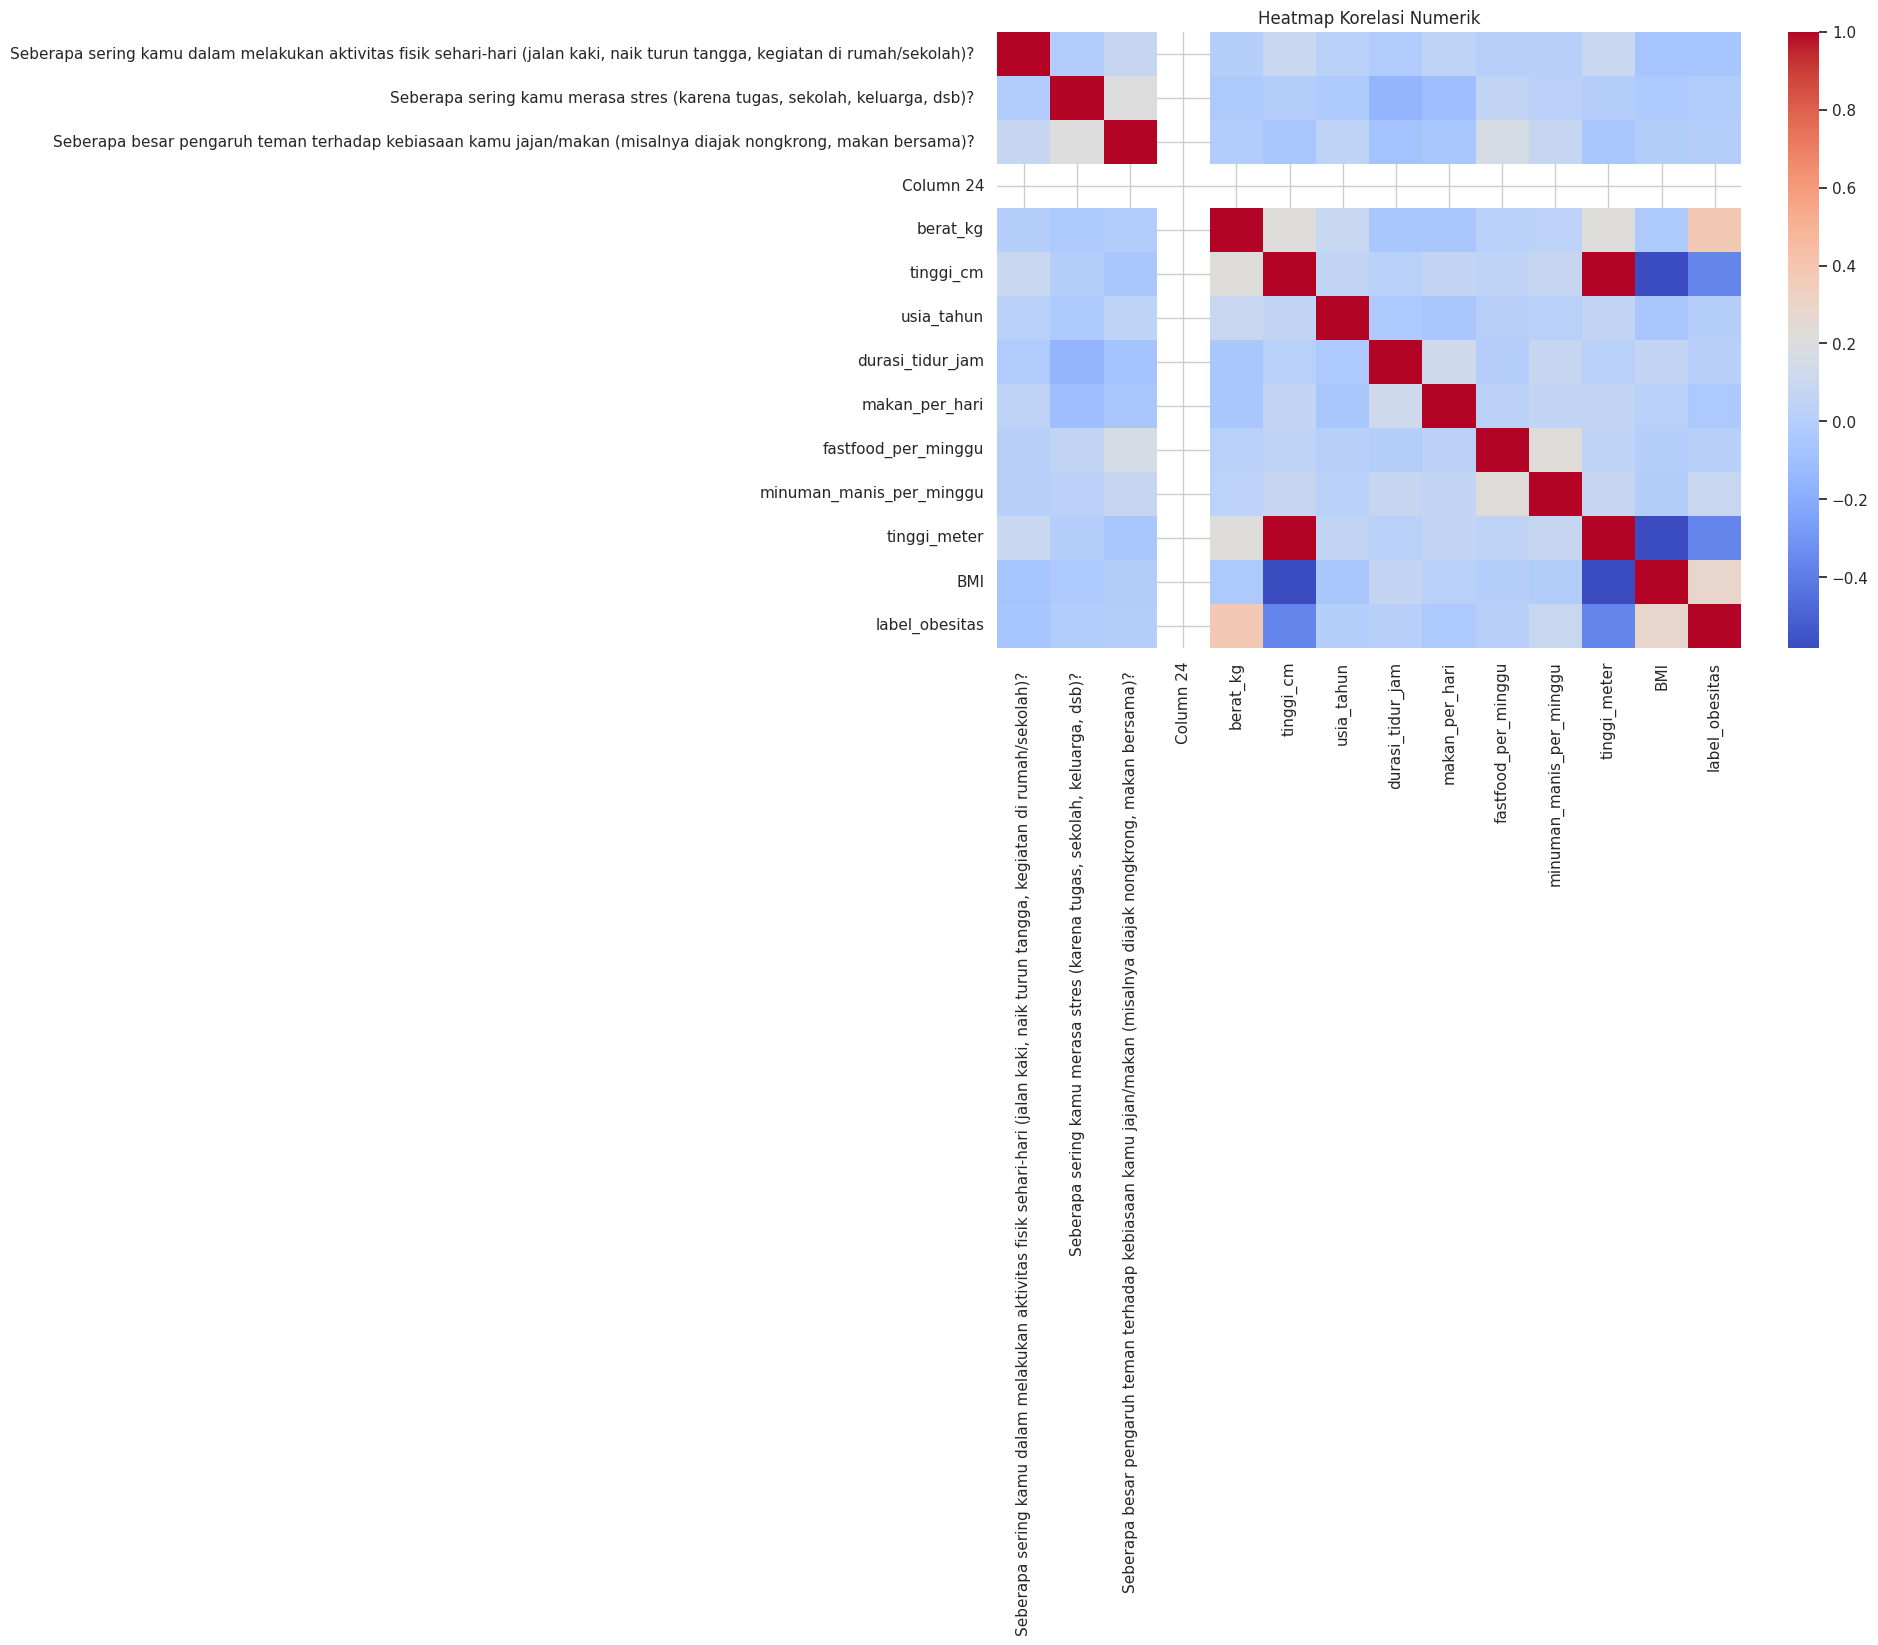

In [ ]:
# ==========================================
# 7. KORELASI ANTAR VARIABEL NUMERIK
# ==========================================
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=False, cmap="coolwarm")
plt.title("Heatmap Korelasi Numerik")
plt.show()

In [ ]:
# ==========================================
# 8. KORELASI DENGAN BMI
# ==========================================
corr_bmi = numeric_df.corr()["BMI"].sort_values(ascending=False)
print("\n===== KORELASI TERHADAP BMI =====")
print(corr_bmi)


===== KORELASI TERHADAP BMI =====
BMI                                                                                                                               1.000000
label_obesitas                                                                                                                    0.282599
keluarga_obesitas                                                                                                                 0.102416
durasi_tidur_jam                                                                                                                  0.069577
makan_per_hari                                                                                                                    0.015487
fastfood_per_minggu                                                                                                               0.003834
Seberapa besar pengaruh teman terhadap kebiasaan kamu jajan/makan (misalnya diajak nongkrong, makan bersama)?                    -0

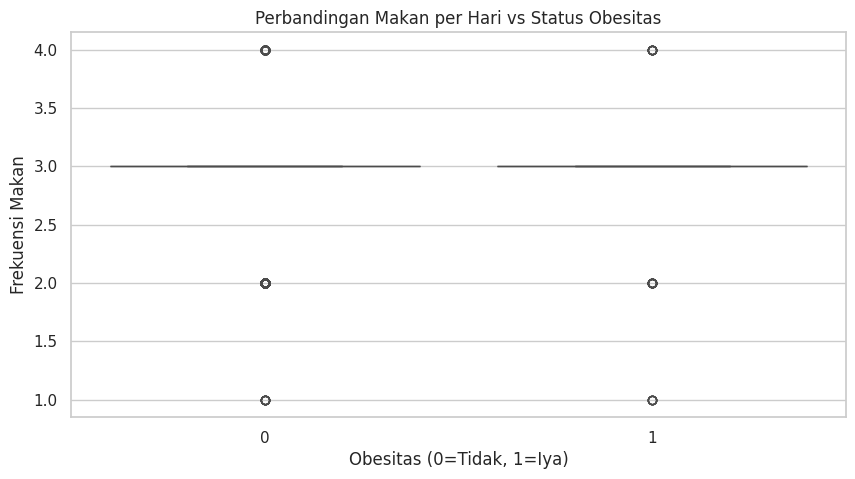

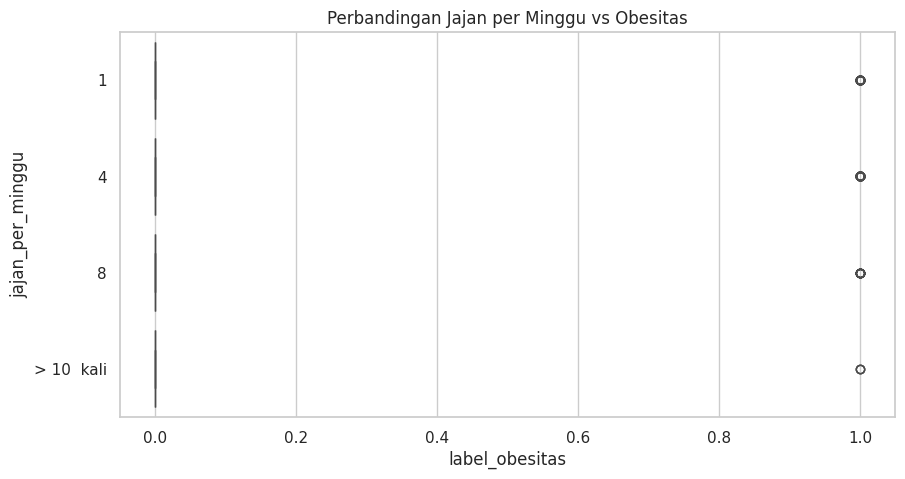

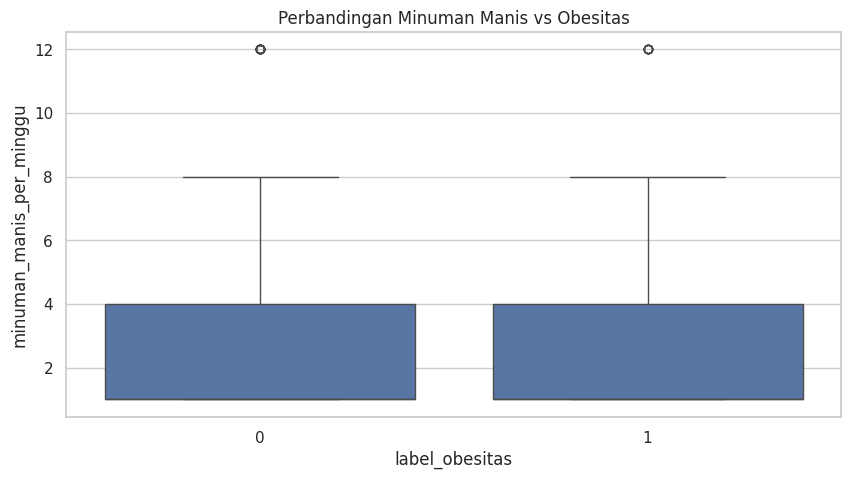

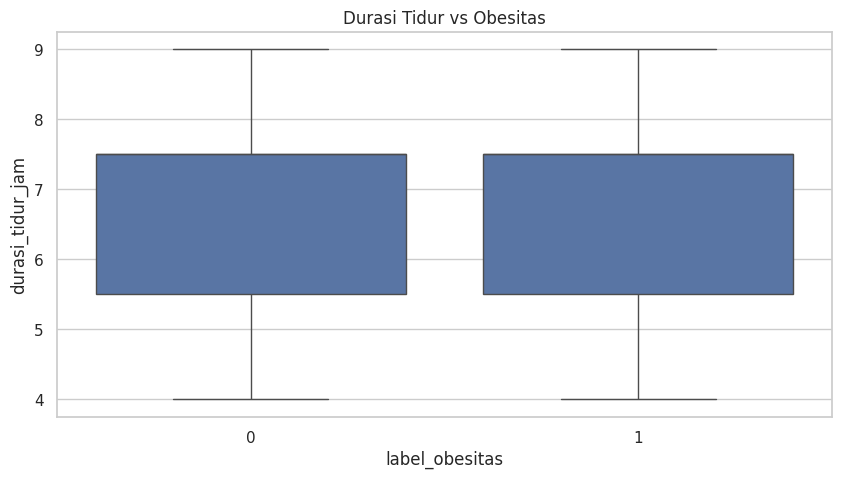

In [ ]:
# ==========================================
# 9. PERBANDINGAN FAKTOR vs OBESITAS
# ==========================================

plt.figure(figsize=(10,5))
sns.boxplot(x="label_obesitas", y="makan_per_hari", data=df)
plt.title("Perbandingan Makan per Hari vs Status Obesitas")
plt.xlabel("Obesitas (0=Tidak, 1=Iya)")
plt.ylabel("Frekuensi Makan")
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(x="label_obesitas", y="jajan_per_minggu", data=df)
plt.title("Perbandingan Jajan per Minggu vs Obesitas")
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(x="label_obesitas", y="minuman_manis_per_minggu", data=df)
plt.title("Perbandingan Minuman Manis vs Obesitas")
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(x="label_obesitas", y="durasi_tidur_jam", data=df)
plt.title("Durasi Tidur vs Obesitas")
plt.show()

In [ ]:
# ==========================================
# 10. FAKTOR KELUARGA vs OBESITAS
# ==========================================
if "Apakah ada keluarga Anda yang pernah atau sedang mengalami obesitas?_Iya" in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x="Apakah ada keluarga Anda yang pernah atau sedang mengalami obesitas?_Iya",
                  hue="label_obesitas", data=df)
    plt.title("Pengaruh Genetik vs Obesitas")
    plt.xlabel("Keluarga Obesitas (1=Iya)")
    plt.show()


In [ ]:
# ==========================================
# 11. INSIGHT AWAL (PRINT)
# ==========================================
print("\n===== INSIGHT AWAL DARI EDA =====")

print(f"""
1. Rata-rata BMI siswa: {df['BMI'].mean():.2f}
2. Persentase obesitas: {df['label_obesitas'].mean() * 100:.2f}%
3. Faktor dengan korelasi tertinggi terhadap BMI:
{corr_bmi.head(6)}

4. Pola makan dan minuman manis cenderung lebih tinggi pada kelompok obesitas.
5. Durasi tidur lebih pendek pada kelompok obesitas.
6. Faktor genetik (keluarga obesitas) terlihat memiliki hubungan signifikan.
""")


===== INSIGHT AWAL DARI EDA =====

1. Rata-rata BMI siswa: 21.16
2. Persentase obesitas: 9.04%
3. Faktor dengan korelasi tertinggi terhadap BMI:
BMI                    1.000000
label_obesitas         0.282599
keluarga_obesitas      0.102416
durasi_tidur_jam       0.069577
makan_per_hari         0.015487
fastfood_per_minggu    0.003834
Name: BMI, dtype: float64

4. Pola makan dan minuman manis cenderung lebih tinggi pada kelompok obesitas.
5. Durasi tidur lebih pendek pada kelompok obesitas.
6. Faktor genetik (keluarga obesitas) terlihat memiliki hubungan signifikan.



In [ ]:
df.columns


Index(['Timestamp', 'Nama lengkap', 'Jenis Kelamin', 'Usia',
       'Jalur Pendidikan', 'Asal Sekolah', 'Kelas',
       'Kamu tinggal bersama siapa',
       ' Berapa berat badan kamu sekarang? (dalam kilogram)  ',
       'Berapa tinggi badan kamu sekarang? (dalam centimeter)',
       'Dalam 7 hari terakhir, rata-rata kamu makan utama (pagi/siang/malam) berapa kali per hari? ',
       'Dalam 7 hari terakhir, kira-kira berapa kali kamu jajan (di luar makan utama)?  ',
       'Dalam 7 hari terakhir, berapa kali kamu makan fast food / makanan cepat saji',
       'Dalam 7 hari terakhir, berapa gelas/porsi minuman manis (teh manis, minuman bersoda, boba, minuman serbuk manis) yang kamu konsumsi?',
       'Secara umum, jenis makanan apa yang paling sering kamu konsumsi?  ',
       'Berapa kali kamu berolahraga dalam seminggu?',
       'Jika kamu berolahraga, rata-rata berapa menit durasi tiap kali olahraga?  ',
       'Seberapa sering kamu dalam melakukan aktivitas fisik sehari-hari (jalan ka

In [ ]:
df["BMI"].head(20)


,BMI
0,20.829995
1,20.077335
2,22.265625
3,23.030045
4,20.000000
5,16.141529
6,20.964361
7,18.349534
8,21.093750
9,23.051755


In [ ]:
df[df["BMI"] > 70][["Nama lengkap", "berat_kg", "tinggi_cm", "tinggi_meter", "BMI"]]

,Nama lengkap,berat_kg,tinggi_cm,tinggi_meter,BMI


In [ ]:
df.loc[df["tinggi_cm"] < 100, "tinggi_cm"] *= 100


In [ ]:
df.loc[df["tinggi_cm"] > 250, "tinggi_cm"] = np.nan


In [ ]:
df["tinggi_meter"] = df["tinggi_cm"] / 100
df["BMI"] = df["berat_kg"] / (df["tinggi_meter"] ** 2)


In [ ]:
df["BMI"].describe()


,BMI
count,1234.000000
mean,21.164566
std,4.152249
min,8.579027
25%,18.827111
50%,20.576132
75%,22.600263
max,61.839393


In [ ]:
# ==========================================
# 11. INSIGHT AWAL (PRINT)
# ==========================================
print("\n===== INSIGHT AWAL DARI EDA =====")

print(f"""
1. Rata-rata BMI siswa: {df['BMI'].mean():.2f}
2. Persentase obesitas: {df['label_obesitas'].mean() * 100:.2f}%
3. Faktor dengan korelasi tertinggi terhadap BMI:
{corr_bmi.head(6)}

4. Pola makan dan minuman manis cenderung lebih tinggi pada kelompok obesitas.
5. Durasi tidur lebih pendek pada kelompok obesitas.
6. Faktor genetik (keluarga obesitas) terlihat memiliki hubungan signifikan.
""")


===== INSIGHT AWAL DARI EDA =====

1. Rata-rata BMI siswa: 21.16
2. Persentase obesitas: 9.04%
3. Faktor dengan korelasi tertinggi terhadap BMI:
BMI                    1.000000
label_obesitas         0.282599
keluarga_obesitas      0.102416
durasi_tidur_jam       0.069577
makan_per_hari         0.015487
fastfood_per_minggu    0.003834
Name: BMI, dtype: float64

4. Pola makan dan minuman manis cenderung lebih tinggi pada kelompok obesitas.
5. Durasi tidur lebih pendek pada kelompok obesitas.
6. Faktor genetik (keluarga obesitas) terlihat memiliki hubungan signifikan.



In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("dataset_bersih_final.csv")

# Convert 'Apakah ada keluarga Anda yang pernah atau sedang mengalami obesitas?' to a numerical column (0/1)
df["keluarga_obesitas"] = df["Apakah ada keluarga Anda yang pernah atau sedang mengalami obesitas?"].apply(lambda x: 1 if x == "Iya" else 0)

# Fitur yang dipakai (sesuaikan dengan dataset kamu)
feature_cols = [
    "usia_tahun",
    "makan_per_hari",
    "jajan_per_minggu",
    "fastfood_per_minggu",
    "minuman_manis_per_minggu",
    "Seberapa sering kamu dalam melakukan aktivitas fisik sehari-hari (jalan kaki, naik turun tangga, kegiatan di rumah/sekolah)?  ",
    "durasi_tidur_jam",
    "Seberapa sering kamu merasa stres (karena tugas, sekolah, keluarga, dsb)?  ",
    "Seberapa besar pengaruh teman terhadap kebiasaan kamu jajan/makan (misalnya diajak nongkrong, makan bersama)?  ",
    "keluarga_obesitas"
]

X = df[feature_cols]
y = df["label_obesitas"]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Train–test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Model
rf = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    class_weight="balanced"
)

rf.fit(X_train, y_train)

# Feature importance
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

print("===== RANDOM FOREST FEATURE IMPORTANCE ====")
print(importances)


ValueError: could not convert string to float: '> 10  kali'

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# =========================
# 1. LOAD DATA
# =========================
df = pd.read_csv("data_siswa-siswi.csv")

In [ ]:
df = df.dropna(axis=1, how="all")

In [ ]:
# =========================
# 2. BERSIHKAN ANGKA DENGAN SATUAN (kg, cm, tahun)
# =========================

def clean_numeric(val):
    if pd.isna(val):
        return np.nan
    val = str(val).lower()
    for unit in ["kg", "cm", "tahun", "th", "jam"]:
        val = val.replace(unit, "")
    val = val.replace(",", ".").strip()
    try:
        return float(val)
    except:
        return np.nan

# Use the actual column names from the raw DataFrame and assign to new, clean columns.
# Correcting the column name to exactly match the DataFrame's column name, including spaces.
df["berat_kg"] = df[" Berapa berat badan kamu sekarang? (dalam kilogram)  "].apply(clean_numeric)
df["tinggi_cm"] = df["Berapa tinggi badan kamu sekarang? (dalam centimeter)"].apply(clean_numeric)
df["usia_tahun"] = df["Usia"].apply(clean_numeric)

In [ ]:
# =========================
# 3. KONVERSI KATEGORI → NILAI RATA2 (untuk pertanyaan frekuensi)
# =========================

# Durasi tidur
mapping_tidur = {
    "< 5 jam": 4,
    "5–6 jam": 5.5,
    "7–8 jam": 7.5,
    "> 8 jam": 9
}
# Corrected: Use the original column name as the source
df["durasi_tidur_jam"] = df["Rata-rata, berapa jam kamu tidur setiap malam?  "].replace(mapping_tidur)

# Makan per hari
mapping_makan = {
    "1 kali": 1,
    "2 kali": 2,
    "3 kali": 3,
    "> 3 kali": 4
}
# Corrected: Use the original column name as the source
df["makan_per_hari"] = df["Dalam 7 hari terakhir, rata-rata kamu makan utama (pagi/siang/malam) berapa kali per hari? "].replace(mapping_makan)
# Jajan per minggu
mapping_jajan = {
    "0 - 2 kali": 1,
    "3 - 5 kali": 4,
    "6 - 10 kali": 8,
    "> 10 kali": 12
}
# Clean the column before mapping to handle inconsistencies like extra spaces
df["jajan_per_minggu"] = df["Dalam 7 hari terakhir, kira-kira berapa kali kamu jajan (di luar makan utama)?  "].astype(str).str.strip().str.replace(r'\s+', ' ', regex=True).replace(mapping_jajan)

# Fast food
mapping_fastfood = {
    "0 - 2 kali": 1,
    "3 -  5 kali": 4,
    "> 5 kali": 7
}
# Corrected: Use the original column name as the source
df["fastfood_per_minggu"] = df["Dalam 7 hari terakhir, berapa kali kamu makan fast food / makanan cepat saji"].replace(mapping_fastfood)

# Minuman manis
mapping_minuman = {
    "0 - 2 gelas": 1,
    "3 - 5 gelas": 4,
    "6 - 10 gelas": 8,
    "> 10 gelas": 12
}
# Corrected: Use the original column name as the source
df["minuman_manis_per_minggu"] = df["Dalam 7 hari terakhir, berapa gelas/porsi minuman manis (teh manis, minuman bersoda, boba, minuman serbuk manis) yang kamu konsumsi?"].replace(mapping_minuman)


/tmp/ipython-input-2776225108.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["durasi_tidur_jam"] = df["Rata-rata, berapa jam kamu tidur setiap malam?  "].replace(mapping_tidur)
/tmp/ipython-input-2776225108.py:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["makan_per_hari"] = df["Dalam 7 hari terakhir, rata-rata kamu makan utama (pagi/siang/malam) berapa kali per hari? "].replace(mapping_makan)
/tmp/ipython-input-2776225108.py:32: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in 

In [ ]:
# =========================
# 4. HITUNG BMI
# =========================
df["tinggi_meter"] = df["tinggi_cm"] / 100
df["BMI"] = df["berat_kg"] / (df["tinggi_meter"] ** 2)

In [ ]:
# =========================
# 5. KATEGORI BMI
# =========================
def bmi_category(bmi):
    if bmi < 18.5:
        return "Kurus"
    elif 18.5 <= bmi < 25:
        return "Normal"
    elif 25 <= bmi < 30:
        return "Overweight"
    else:
        return "Obesitas"

df["kategori_BMI"] = df["BMI"].apply(bmi_category)

# Buat label 0/1 untuk machine learning
df["label_obesitas"] = df["kategori_BMI"].apply(lambda x: 1 if x == "Obesitas" else 0)


In [ ]:
# =========================
# 6. ENCODE KATEGORI
# =========================
kategori_cols = [
    "Jenis Kelamin",
    "Jalur Pendidikan",
    "Asal Sekolah",
    "Kelas",
    "Kamu tinggal bersama siapa",
    "Secara umum, jenis makanan apa yang paling sering kamu konsumsi?  "
]

# Apply get_dummies to df_clean (assuming this is the dataframe before encoding)
# and assign the result to df_encoded for the next step.
df_encoded = pd.get_dummies(df_clean, columns=kategori_cols, drop_first=True)

In [ ]:
# =========================
# 7. SIMPAN DATASET BERSIH
# =========================
df.to_csv("dataset_bersih_final.csv", index=False)

df.head()

,Timestamp,Nama lengkap,Jenis Kelamin,Usia,Jalur Pendidikan,Asal Sekolah,Kelas,Kamu tinggal bersama siapa,Berapa berat badan kamu sekarang? (dalam kilogram),Berapa tinggi badan kamu sekarang? (dalam centimeter),...,usia_tahun,durasi_tidur_jam,makan_per_hari,jajan_per_minggu,fastfood_per_minggu,minuman_manis_per_minggu,tinggi_meter,BMI,kategori_BMI,label_obesitas
0,27/11/2025 14:11:47,Shalomytha Febrina Siregar,Perempuan,17,SMA,SMA NEGERI 1 TARUTUNG,XII,Orang tua/Wali,52kg,158cm,...,17.0,4.0,3,1,1,1,1.58,20.829995,Normal,0
1,27/11/2025 14:30:25,Gracia Lumbantobing,Perempuan,18,SMA,SMA NEGERI 1 TARUTUNG,XII,Kost,54,164,...,18.0,7.5,3,1,1,1,1.64,20.077335,Normal,0
2,27/11/2025 14:40:28,Rossevi Tamba,Perempuan,18 tahun,SMA,SMA NEGERI 3 TARUTUNG,XII,Orang tua/Wali,57,160,...,18.0,5.5,2,4,1,1,1.60,22.265625,Normal,0
3,27/11/2025 14:51:04,Khatarina Hutasoit,Perempuan,18,SMA,SMA NEGERI 3 TARUTUNG,XII,Kost,65,168,...,18.0,4.0,2,1,4,1,1.68,23.030045,Normal,0
4,27/11/2025 16:03:10,Theresia Hasibuan,Perempuan,18 tahun,SMA,SMA NEGERI 3 TARUTUNG,XII,Orang tua/Wali,45kg,150cm,...,18.0,5.5,3,8,4,8,1.50,20.000000,Normal,0


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("dataset_bersih_final.csv")

# Convert 'Apakah ada keluarga Anda yang pernah atau sedang mengalami obesitas?' to a numerical column (0/1)
df["keluarga_obesitas"] = df["Apakah ada keluarga Anda yang pernah atau sedang mengalami obesitas?"].apply(lambda x: 1 if x == "Iya" else 0)

# Fitur yang dipakai (sesuaikan dengan dataset kamu)
feature_cols = [
    "usia_tahun",
    "makan_per_hari",
    "jajan_per_minggu",
    "fastfood_per_minggu",
    "minuman_manis_per_minggu",
    "Seberapa sering kamu dalam melakukan aktivitas fisik sehari-hari (jalan kaki, naik turun tangga, kegiatan di rumah/sekolah)?  ",
    "durasi_tidur_jam",
    "Seberapa sering kamu merasa stres (karena tugas, sekolah, keluarga, dsb)?  ",
    "Seberapa besar pengaruh teman terhadap kebiasaan kamu jajan/makan (misalnya diajak nongkrong, makan bersama)?  ",
    "keluarga_obesitas"
]

X = df[feature_cols]
y = df["label_obesitas"]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Train–test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Model
rf = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    class_weight="balanced"
)

rf.fit(X_train, y_train)

# Feature importance
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

print("===== RANDOM FOREST FEATURE IMPORTANCE ====")
print(importances)


===== RANDOM FOREST FEATURE IMPORTANCE ====
usia_tahun                                                                                                                        0.138749
Seberapa besar pengaruh teman terhadap kebiasaan kamu jajan/makan (misalnya diajak nongkrong, makan bersama)?                     0.132696
Seberapa sering kamu merasa stres (karena tugas, sekolah, keluarga, dsb)?                                                         0.130821
Seberapa sering kamu dalam melakukan aktivitas fisik sehari-hari (jalan kaki, naik turun tangga, kegiatan di rumah/sekolah)?      0.123175
durasi_tidur_jam                                                                                                                  0.103001
jajan_per_minggu                                                                                                                  0.095718
makan_per_hari                                                                                                            

In [ ]:
# PREDIKSI

In [ ]:
# ================================================
# 1. IMPORT LIBRARIES
# ================================================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    roc_auc_score
)
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# ================================================
# 1. IMPORT LIBRARIES (Already done in cell w5pCGENLHeqR)
# ================================================

# ================================================
# 2. LOAD DATASET BERSIH & PRE-ENCODE CATEGORICALS
# ================================================
df = pd.read_csv("dataset_bersih_final.csv")

# Encode Jenis Kelamin
df["jenis_kelamin_num"] = df["Jenis Kelamin"].map({"Laki-laki": 1, "Perempuan": 0})

# Encode keluarga obesitas
df["keluarga_obesitas_num"] = df["Apakah ada keluarga Anda yang pernah atau sedang mengalami obesitas?"].map({
    "Iya": 1,
    "Tidak": 0
})

# Activity physical
df["aktivitas_fisik_num"] = df[
    "Seberapa sering kamu dalam melakukan aktivitas fisik sehari-hari (jalan kaki, naik turun tangga, kegiatan di rumah/sekolah)?  "
]

# Stres
df["tingkat_stres_num"] = df[
    "Seberapa sering kamu merasa stres (karena tugas, sekolah, keluarga, dsb)?  "
]

# Pengaruh teman
df["pengaruh_teman_num"] = df[
    "Seberapa besar pengaruh teman terhadap kebiasaan kamu jajan/makan (misalnya diajak nongkrong, makan bersama)?  "
]

In [ ]:
# ==========================================================
# 3. DEFINISIKAN FITUR & LABEL SESUAI KOLOM FIX (NUMERIK)
# ==========================================================

features = [
    "usia_tahun",
    "jenis_kelamin_num",
    "makan_per_hari",
    "minuman_manis_per_minggu",
    "fastfood_per_minggu",
    "jajan_per_minggu",
    "aktivitas_fisik_num",
    "durasi_tidur_jam",
    "tingkat_stres_num",
    "pengaruh_teman_num",
    "keluarga_obesitas_num"
]

X = df[features].copy() # Make a copy to avoid SettingWithCopyWarning
y = df["label_obesitas"]


In [ ]:
import pandas as pd

df_check = pd.read_csv("dataset_bersih_final.csv")
print(df_check.columns)

Index(['Timestamp', 'Nama lengkap', 'Jenis Kelamin', 'Usia',
       'Jalur Pendidikan', 'Asal Sekolah', 'Kelas',
       'Kamu tinggal bersama siapa',
       ' Berapa berat badan kamu sekarang? (dalam kilogram)  ',
       'Berapa tinggi badan kamu sekarang? (dalam centimeter)',
       'Dalam 7 hari terakhir, rata-rata kamu makan utama (pagi/siang/malam) berapa kali per hari? ',
       'Dalam 7 hari terakhir, kira-kira berapa kali kamu jajan (di luar makan utama)?  ',
       'Dalam 7 hari terakhir, berapa kali kamu makan fast food / makanan cepat saji',
       'Dalam 7 hari terakhir, berapa gelas/porsi minuman manis (teh manis, minuman bersoda, boba, minuman serbuk manis) yang kamu konsumsi?',
       'Secara umum, jenis makanan apa yang paling sering kamu konsumsi?  ',
       'Berapa kali kamu berolahraga dalam seminggu?',
       'Jika kamu berolahraga, rata-rata berapa menit durasi tiap kali olahraga?  ',
       'Seberapa sering kamu dalam melakukan aktivitas fisik sehari-hari (jalan ka

In [ ]:
# ==========================================================
# 4. TRAIN-TEST SPLIT
# ==========================================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
# ==========================================================
# 5. STANDARDIZATION
# ==========================================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# ==========================================================
# FIX: IMPUTASI DATA HILANG (NaN) - DILAKUKAN SEBELUM SPLIT
# ==========================================================

# Daftar kolom numerik yang akan diisi median
numeric_cols_to_impute = [
    "usia_tahun",
    "makan_per_hari",
    "minuman_manis_per_minggu",
    "fastfood_per_minggu",
    "jajan_per_minggu",
    "aktivitas_fisik_num",
    "durasi_tidur_jam",
    "tingkat_stres_num",
    "pengaruh_teman_num"
]

# Isi median untuk kolom numerik
for col in numeric_cols_to_impute:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())

# Isi modus untuk kolom kategori yang sudah di-encode
if "jenis_kelamin_num" in df.columns:
    df["jenis_kelamin_num"] = df["jenis_kelamin_num"].fillna(df["jenis_kelamin_num"].mode()[0])
if "keluarga_obesitas_num" in df.columns:
    df["keluarga_obesitas_num"] = df["keluarga_obesitas_num"].fillna(df["keluarga_obesitas_num"].mode()[0])


In [ ]:
X = df[features]
y = df["label_obesitas"]


In [ ]:
logreg.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=300)

In [ ]:
# ==========================================================
# 6. LOGISTIC REGRESSION
# ==========================================================
logreg = LogisticRegression(max_iter=300)
logreg.fit(X_train_scaled, y_train)

y_pred_logreg = logreg.predict(X_test_scaled)
y_prob_logreg = logreg.predict_proba(X_test_scaled)[:, 1]


In [ ]:
# ==========================================================
# 7. RANDOM FOREST CLASSIFIER
# ==========================================================
rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]


In [ ]:
# ==========================================================
# 8. EVALUASI MODEL
# ==========================================================
def evaluate_model(title, y_test, y_pred):
    print(f"\n===== {title} =====")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall   :", recall_score(y_test, y_pred))
    print("F1-score :", f1_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

evaluate_model("Logistic Regression", y_test, y_pred_logreg)
evaluate_model("Random Forest", y_test, y_pred_rf)



===== Logistic Regression =====
Accuracy : 0.9090909090909091
Precision: 0.0
Recall   : 0.0
F1-score : 0.0

Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95       240
           1       0.00      0.00      0.00        24

    accuracy                           0.91       264
   macro avg       0.45      0.50      0.48       264
weighted avg       0.83      0.91      0.87       264


===== Random Forest =====
Accuracy : 0.9015151515151515
Precision: 0.25
Recall   : 0.041666666666666664
F1-score : 0.07142857142857142

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95       240
           1       0.25      0.04      0.07        24

    accuracy                           0.90       264
   macro avg       0.58      0.51      0.51       264
weighted avg       0.85      0.90      0.87       264



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

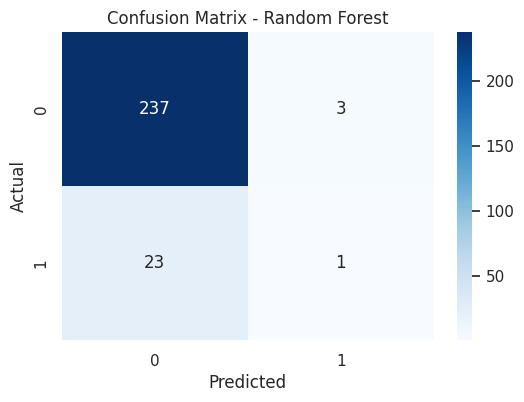

In [ ]:
# ==========================================================
# 9. CONFUSION MATRIX (Random Forest)
# ==========================================================
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


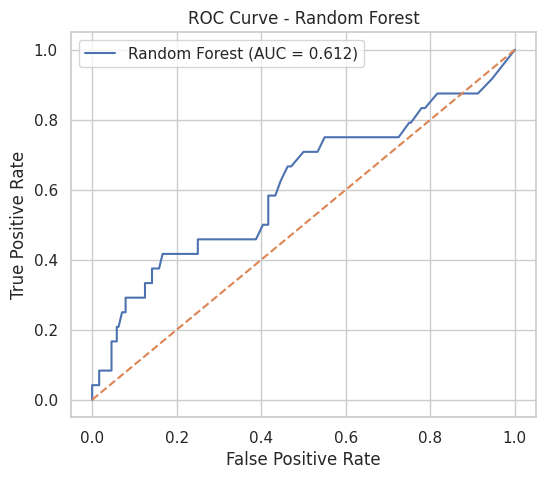

In [ ]:
# ==========================================================
# 10. ROC CURVE - RANDOM FOREST
# ==========================================================
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
auc = roc_auc_score(y_test, y_prob_rf)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()


===== RANDOM FOREST FEATURE IMPORTANCE =====
pengaruh_teman_num          0.126055
aktivitas_fisik_num         0.120047
usia_tahun                  0.119455
tingkat_stres_num           0.118766
durasi_tidur_jam            0.104261
makan_per_hari              0.097916
jajan_per_minggu            0.090037
minuman_manis_per_minggu    0.071684
keluarga_obesitas_num       0.053413
jenis_kelamin_num           0.051425
fastfood_per_minggu         0.046942
dtype: float64


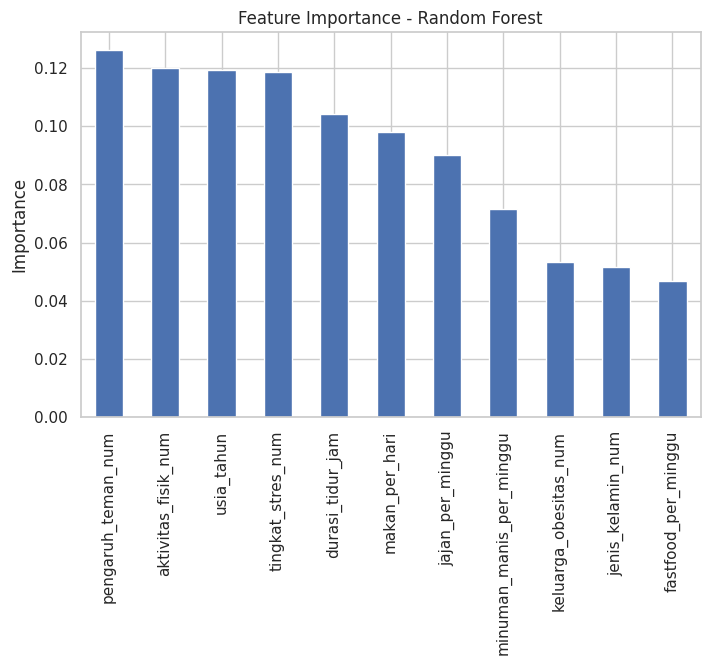

In [ ]:
# ==========================================================
# 11. FEATURE IMPORTANCE
# ==========================================================
feat_imp = pd.Series(
    rf.feature_importances_,
    index=features
).sort_values(ascending=False)

print("\n===== RANDOM FOREST FEATURE IMPORTANCE =====")
print(feat_imp)

plt.figure(figsize=(8,5))
feat_imp.plot(kind='bar')
plt.title("Feature Importance - Random Forest")
plt.ylabel("Importance")
plt.show()

In [ ]:
# ==========================================================
# FUNGSI UNTUK MELAKUKAN PREDIKSI OBESITAS
# ==========================================================

def prediksi_obesitas(
    usia,
    jenis_kelamin,
    makan_per_hari,
    minuman_manis,
    fastfood,
    jajan,
    aktivitas_fisik,
    tidur_jam,
    stres,
    pengaruh_teman,
    keluarga_obesitas
):

    # Convert gender to numeric
    jk = 1 if jenis_kelamin == "Laki-laki" else 0

    # Convert keluarga obesitas
    kel = 1 if keluarga_obesitas == "Iya" else 0

    # Buat array fitur sesuai urutan aslinya
    data = [[
        usia,
        jk,
        makan_per_hari,
        minuman_manis,
        fastfood,
        jajan,
        aktivitas_fisik,
        tidur_jam,
        stres,
        pengaruh_teman,
        kel
    ]]

    # Scaling menggunakan scaler yang sudah dilatih
    data_scaled = scaler.transform(data)

    # Prediksi
    pred = logreg.predict(data_scaled)[0]
    prob = logreg.predict_proba(data_scaled)[0][1]

    print("===== HASIL PREDIKSI =====")
    print(f"Probabilitas obesitas: {prob * 100:.2f}%")
    print("Status prediksi:", "Obesitas" if pred == 1 else "Tidak Obesitas")

    return pred, prob


In [ ]:
def prediksi_obesitas_v2(
    usia,
    jenis_kelamin,
    makan_per_hari,
    minuman_manis,
    fastfood,
    jajan,
    aktivitas_fisik,
    tidur_jam,
    stres,
    pengaruh_teman,
    keluarga_obesitas
):

    # VALIDASI NILAI (Hindari nilai tidak masuk akal)
    if aktivitas_fisik < 1: aktivitas_fisik = 1
    if stres < 1: stres = 1
    if pengaruh_teman < 1: pengaruh_teman = 1
    if makan_per_hari < 1: makan_per_hari = 1
    if tidur_jam < 4: tidur_jam = 4   # Tidur < 4 jam sangat jarang dan bikin model kacau

    # Encoding Gender
    jk = 1 if jenis_kelamin == "Laki-laki" else 0

    # Encoding keluarga obesitas
    kel = 1 if keluarga_obesitas == "Iya" else 0

    # Buat dataframe agar konsisten dengan scaler
    data = pd.DataFrame([[
        usia,
        jk,
        makan_per_hari,
        minuman_manis,
        fastfood,
        jajan,
        aktivitas_fisik,
        tidur_jam,
        stres,
        pengaruh_teman,
        kel
    ]], columns=features)

    # Scaling
    data_scaled = scaler.transform(data)

    # Prediksi
    pred = logreg.predict(data_scaled)[0]
    prob = logreg.predict_proba(data_scaled)[0][1]

    print("===== HASIL PREDIKSI (v2) =====")
    print(f"Probabilitas obesitas: {prob * 100:.2f}%")
    print("Status prediksi:", "Obesitas" if pred == 1 else "Tidak Obesitas")

    return pred, prob


In [ ]:
prediksi_obesitas_v2(
    usia=16,
    jenis_kelamin="Laki-laki",
    makan_per_hari=2,
    minuman_manis=2,
    fastfood=1,
    jajan=2,
    aktivitas_fisik=1,
    tidur_jam=5,
    stres=1,
    pengaruh_teman=1,
    keluarga_obesitas="Iya"
)


===== HASIL PREDIKSI (v2) =====
Probabilitas obesitas: 42.67%
Status prediksi: Tidak Obesitas


(np.int64(0), np.float64(0.42670978848371993))

In [ ]:
prediksi_obesitas_v2(
    usia=17,
    jenis_kelamin="Laki-laki",
    makan_per_hari=3,
    minuman_manis=10,     # tinggi → pemicu obesitas
    fastfood=5,           # sangat tinggi
    jajan=10,             # jajan sangat sering
    aktivitas_fisik=1,    # tidak aktif
    tidur_jam=4,          # kurang tidur
    stres=4,              # stres tinggi
    pengaruh_teman=5,     # teman memicu jajan
    keluarga_obesitas="Iya"
)


===== HASIL PREDIKSI (v2) =====
Probabilitas obesitas: 36.20%
Status prediksi: Tidak Obesitas


(np.int64(0), np.float64(0.36196242741893675))

In [ ]:
prediksi_obesitas_v2(
    usia=16,
    jenis_kelamin="Perempuan",
    makan_per_hari=3,
    minuman_manis=7,
    fastfood=3,
    jajan=6,
    aktivitas_fisik=1,
    tidur_jam=5,
    stres=4,
    pengaruh_teman=4,
    keluarga_obesitas="Iya"
)


===== HASIL PREDIKSI (v2) =====
Probabilitas obesitas: 39.09%
Status prediksi: Tidak Obesitas


(np.int64(0), np.float64(0.3909098259182944))